Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [21]:
# Dependencies

import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [22]:
# Apply the sigmoid function to an input X
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [23]:
# Linear model from HW2
def model(x,w):
    
    return w[0] + np.dot(x.T, w[1:])

# Calculate cross entropy cost between actual and predicted y values 
def cross_entropy(w,x,y):
    
    # Apply inputs and weights to model to get predicted y values
    y_predicted = np.array([sigmoid(model(x,w))])
    
    # Calculate the cost where value == 0
    cost = -np.sum(np.log(1 - y_predicted[:, np.argwhere(y == 0)[:,1]]))
    
    # Calculate the cost where value == 1
    cost -= np.sum(np.log(y_predicted[:,np.argwhere(y == 1)[:,1]]))
    
    # Return average cost
    return cost / y.size

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

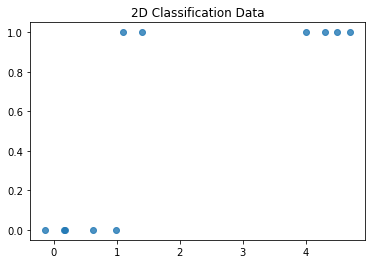

In [24]:
# Read data file and save X and Y values
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# Plot each point in the dataset
plt.scatter(x, y, alpha=0.8)
plt.title("2D Classification Data")
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [25]:
# Gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    
    # Automatically calculate gradient using autograd
    gradient = grad(g)
    # Save initial weight and calculate its cost
    weight_history, cost_history = [w], [g(w,x,y)]
    
    # Refine parameters until we reach maximum number of training iterations
    for k in range(1, max_its):
            
        # Implement the update rule
        new_weights = w - alpha * gradient(w,x,y)
        # Save new weights and calculate their cost
        cost_history.append(g(new_weights,x,y)), weight_history.append(new_weights)
        # Update old weight
        w = new_weights
        
    # Return weight and cost history
    return weight_history,cost_history

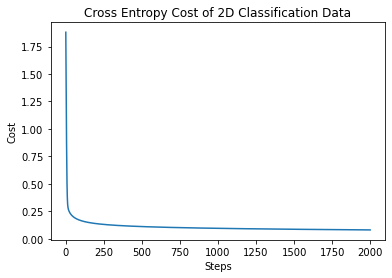

In [26]:
# Constants
alpha = 1.0
max_its = 2000
w = np.array([3.0, 3.0])

# Train weights using cross entropy cost
weight_history, cost_history = gradient_descent(cross_entropy,alpha,max_its,w,x,y)

# Plot the cross entropy cost history
plt.plot(cost_history)
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Cross Entropy Cost of 2D Classification Data")
plt.show()

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [27]:
# Logistic regression classifier
def logistic_regression(learned_w,x):
    
    # Return the sigmoid function applied to predicted y values  
    return sigmoid(model(x,learned_w))

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


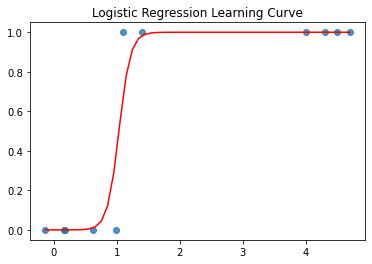

In [28]:
# Generate arbitrary X values
s = np.linspace(np.min(x),np.max(x))
s_compat = np.reshape(s, (1, len(s)))

# Run logistic regression
learned_weights = weight_history[-1]
positive_class_prob = logistic_regression(learned_weights,s_compat)

# Plot the learned curve
plt.scatter(x, y, alpha=0.8)
plt.plot(s_compat[0], positive_class_prob, color="red")
plt.title("Logistic Regression Learning Curve")
plt.show()

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [29]:
# Logistic regression model with threshold
def logistic_regression_modified(learned_w,x, threshold):
    
    # Traditional logistic regression
    positive_class_prob = np.array([sigmoid(model(x,learned_w))])
    # Turn output into binary classifier
    class_label = np.where(positive_class_prob < threshold, 0.0, 1.0)
    
    # Return either 0 or 1
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [30]:
# Evaluate the accuracy of predicted versus actual outputs
def evaluate(y_actual,y_pred):
    
    # Initialize confusion matrix
    false_positive, false_negative, true_positive, true_negative = 0, 0, 0, 0
    
    # For each pair of actual and predicted y values
    for i in range(len(y_actual)):
        
        if y_actual[i] == 1.0:
            
            # True positive result when y actual and y predicted are 1
            if y_pred[i] == 1.0:
                true_positive += 1
            
            # False negative result when y actual is 1 but y predicted is 0
            else:
                false_negative += 1
        
        else:
            
            # False positive result when y predicted is 1 but y actual is 0
            if y_pred[i] == 1.0:
                false_positive += 1
                
            # True negative result when y predicted and y actual are 1
            else:
                true_negative += 1
    
    # Calculate accuracy
    accuracy = (true_positive + true_negative) / len(y_actual) * 100 
    
    # Assemble confusion matrix
    confusion_matrix = np.array([[true_positive, false_negative],
                            [false_positive, true_negative]])
    
    return confusion_matrix, accuracy

# Set binary label threshold
threshold = 0.5

# Get predicted class labels with logistic regression
class_labels = logistic_regression_modified(learned_weights, x, threshold)

# Evaluate logistic regression performance
confusion_matrix, accuracy = evaluate(class_labels[0], y[0])
print('The confusion matrix for this problem is\n\n', confusion_matrix)
print('\nWhich yields an accuracy of ' + str(accuracy) + '%')

The confusion matrix for this problem is

 [[6 0]
 [0 5]]

Which yields an accuracy of 100.0%


Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [31]:
# Perceptron cost function
def perceptron_cost(w,x,y):
    
    # Use linear model to get predicted y values
    y_predicted = model(x,w)
    
    # Save actual y values
    y_actual = y[0]
    
    # Initialize cost
    cost = 0.0
    
    # Calculate perceptron cost for each pair of actual and predicted y values
    for i in range(len(y_actual)):
        
        cost += np.log(1 + np.exp(-y_predicted[i] * y_actual[i]))
    
    # Return average perceptron cost
    return cost / y.size


Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


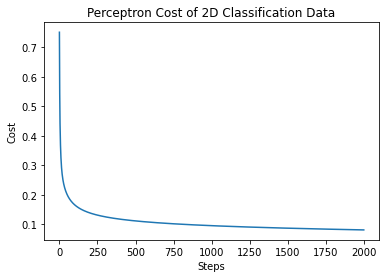

In [32]:
# Constants
max_its = 2000
w = np.array([1.0, 1.0])
alpha = 1.0

# Change 0 labels to -1
y[y==0] = -1

# Calculate weights and cost for gradient descent using perceptron cost
weight_history, cost_history = gradient_descent(perceptron_cost, alpha, max_its, w, x, y)

# Plot perceptron cost history
plt.plot(cost_history)
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Perceptron Cost of 2D Classification Data")
plt.show()

Perceptron cost converges faster than cross entropy cost. In other words, perceptron cost devises a decision boundary that more accurately separates the data based on its labels – and does so in fewer steps – than cross entropy cost. This makes perceptron cost a better fit for the dataset.

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [33]:
# Read CSV file
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [34]:
# Save y values as values in the "target" column
y = df['target']

# Save x values as all other data
x = df.loc[:, df.columns != 'target']

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [35]:
# sklearn dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [41]:
# Fit a logistic regression model to training set
regression = LogisticRegression(max_iter=2000).fit(x_train, y_train)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [42]:
# Get predicted y values for binary classifier
y_predicted = regression.predict_proba(x_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [43]:
# Filter predictions
class1_predictions = [pred[1] for pred in y_predicted]

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

These are the thresholds generated by the ROC curve function:

 [1.99353606 0.99353606 0.84274966 0.84148127 0.80903075 0.80374565
 0.68954079 0.659715   0.49473027 0.35805239 0.35419916 0.12304434
 0.10592007 0.00322607]


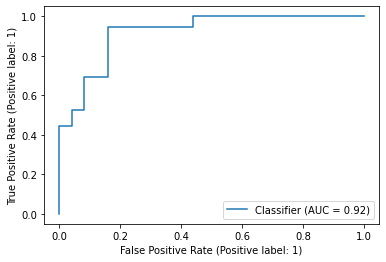

In [44]:
# sklearn dependencies
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# Evaluate classifier performance
fpr, tpr, thresholds = metrics.roc_curve(y_test, class1_predictions)

# Plot ROC curve
plot = RocCurveDisplay.from_predictions(y_test, class1_predictions)
print('These are the thresholds generated by the ROC curve function:\n\n', thresholds)

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [45]:
# Report AUC score
auc_score = roc_auc_score(y_test, class1_predictions)
print('The AUC score of this model is:\n\n', round(auc_score, 3))

The AUC score of this model is:

 0.919
